In [32]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pdr.get_data_yahoo('000333.SZ', start=datetime.datetime(2015,10,1), end=datetime.datetime.now())

In [3]:
daily_volume = d[['Volume']]

In [42]:
signals = pd.DataFrame(index=d.index)
signals['signal'] = 0.0
signals['volume'] = daily_volume
signals['avg_volume'] = daily_volume.rolling(window=100, min_periods=1, center=False).mean().fillna(0)
signals['std_volume'] = daily_volume.rolling(window=100, min_periods=1, center=False).std().fillna(0)

In [79]:
f_factor = 2

In [80]:
signals['signal'] = np.where(signals['volume'] > signals['avg_volume'] + signals['std_volume'] * f_factor, 1.0, 0.0)

In [81]:
signals.loc[signals.signal == 1.0].head()

,signal,volume,avg_volume,std_volume
Date,,,,
2015-11-05,1.0,59526082,3.535274e+07,1.057623e+07
2015-11-20,1.0,61161225,3.707039e+07,1.104876e+07
2015-12-02,1.0,87793744,3.866321e+07,1.298665e+07
2015-12-21,1.0,70330125,3.804738e+07,1.297972e+07
2015-12-30,1.0,66837158,3.806700e+07,1.405782e+07


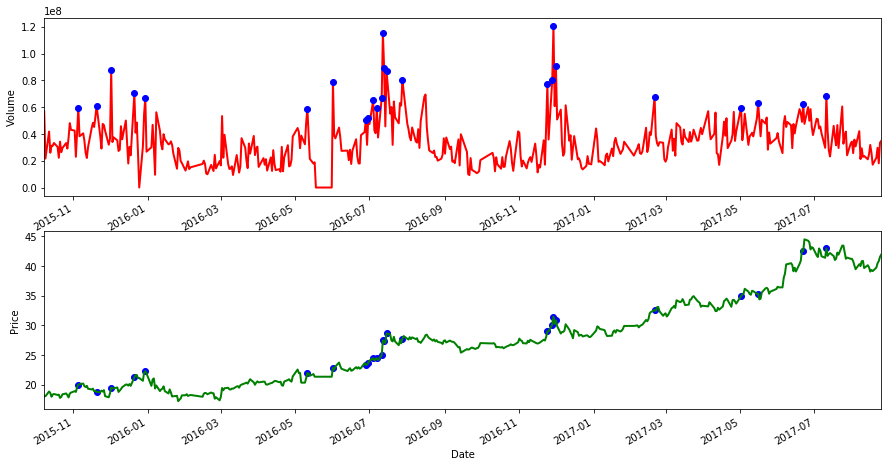

In [82]:
fig, ax1 = None, None
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211, ylabel='Volume')
daily_volume['Volume'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(signals.loc[signals.signal == 1.0].index, signals['volume'][signals.signal == 1.0], 'bo')
ax2 = fig.add_subplot(212, ylabel='Price')
ax2.plot(signals.loc[signals.signal == 1.0].index, d['Close'][signals.signal == 1.0], 'bo')
d['Close'].plot(ax=ax2, color='g', lw=2.)
plt.show()